In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

%matplotlib inline

Contours are simply a curve joining continuous points(along the boundary), having same color and intensity. Contours are useful for shape analysis and object dection and recognition.

- For better accuracy, use binary images. So before finding contours, apply threshold or canny edge detection.
- findContours function modifies the source image. So if you want source image even after finding contours, already store it to some other variables
- In OpenCV, finding a contour is like finding a white object from a black background. So, object to be found should be white and background should be black.

In [2]:
img = cv2.imread('images/binary.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)
image, contours, hierarchy = cv2.findContours(thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)

In [3]:
#contours

[array([[[ 19, 180]],
 
        [[ 19, 181]],
 
        [[ 21, 181]],
 
        [[ 21, 180]]], dtype=int32), array([[[219, 175]],
 
        [[219, 176]],
 
        [[221, 176]],
 
        [[220, 175]]], dtype=int32), array([[[157, 111]],
 
        [[156, 112]],
 
        [[152, 112]],
 
        [[151, 113]],
 
        [[147, 113]],
 
        [[146, 114]],
 
        [[144, 114]],
 
        [[143, 115]],
 
        [[133, 115]],
 
        [[132, 116]],
 
        [[127, 116]],
 
        [[126, 117]],
 
        [[120, 117]],
 
        [[119, 118]],
 
        [[118, 118]],
 
        [[117, 119]],
 
        [[113, 119]],
 
        [[112, 120]],
 
        [[106, 120]],
 
        [[105, 121]],
 
        [[104, 121]],
 
        [[103, 122]],
 
        [[102, 121]],
 
        [[101, 122]],
 
        [[ 94, 122]],
 
        [[ 92, 124]],
 
        [[ 92, 126]],
 
        [[ 98, 132]],
 
        [[ 98, 133]],
 
        [[101, 136]],
 
        [[103, 136]],
 
        [[104, 137]],
 
        [[105, 1

There are three arguments in cv2.findContours() function, first one is source image, second is contour retrieval mode, third is contour approximation method.  contours is a Python list of all the contours in the image. Each individual contour is a Numpy array of (x,y) coordinates of boundary points of the object.

##### How to draw contours

To draw contours **cv2.drawContours()** is used. It can also be used to draw any shape provided you has boundary points. The function can also be used to draw any shape if provided with boundary points. Its first argument is source image, second argument is the contours which should be passed as a Python list, third argument is index of contours (useful when drawing individual contour. To draw all contours, pass -1) and remaining arguments are color, thickness etc.

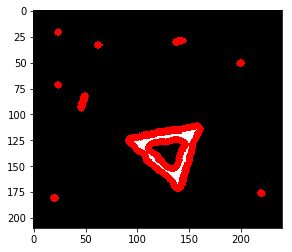

In [5]:
img_copy = img.copy()
cv2.drawContours(img_copy, contours, -1, (255, 0, 0), 2)
plt.imshow(img_copy);

To draw Individual contours:

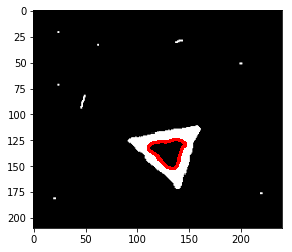

In [45]:
img_copy = img.copy()
cv2.drawContours(img_copy, contours, 3, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

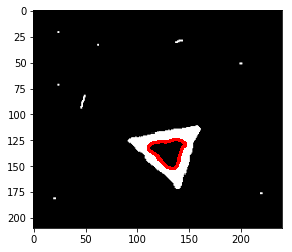

In [46]:
img_copy = img.copy()
cnt = contours[3]
cv2.drawContours(img_copy, [cnt], 0, (255, 0, 0), 2) #Draws fourth contour
plt.imshow(img_copy);

> Last two methods are same, but the seconds one is more useful.

##### Contour Approximation Method

Third arg of **cv2.findContours()**

We know that contours are the boundaries of a shape with same intensity. It stores (x,y) coordinates of the boundary of a shape. But does it store all the coordinates? That is specified by this contour approximation method. 

**cv2.CHAIN_APPROX_NONE** - all the boundary points are stored. But usually we don't need all the points. For instance, a contour of a stright line needs only two points.

**cv2.CHAIN_APPROX_SIMPLE** - removes all redundant points and compresses the contour, thereby saving memory.

In [79]:
def plot_subplot(img1, img2, title1, title2):
    plt.figure(figsize=(15, 6))
    plt.subplot(121)
    plt.imshow(img1, 'gray')
    plt.title(title1)
    plt.xticks([])
    plt.yticks([]);

    plt.subplot(122)
    plt.imshow(img2, 'gray')
    plt.title(title2)
    plt.xticks([])
    plt.yticks([]);

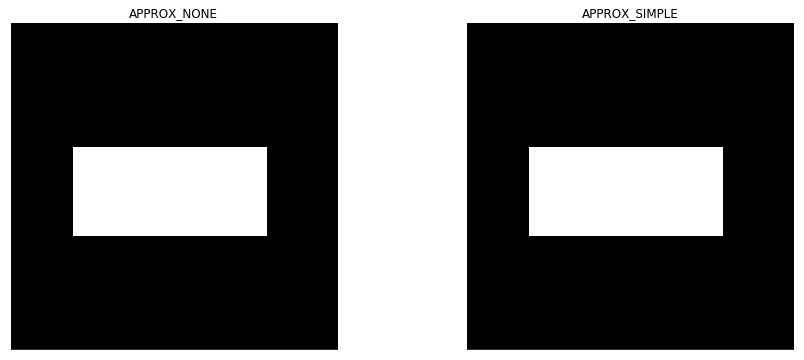

In [90]:
img = cv2.imread('images/binary_rect.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, img_thresh = cv2.threshold(img, 127, 255, 0)
image1, contours_none, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_NONE)
image2, contours_simple, hierarchy = cv2.findContours(img_thresh,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
img_c1 = img.copy()
img_c2 = img.copy()

cv2.drawContours(img_c1, contours_none, 0, (0, 0, 255), 15)
cv2.drawContours(img_c2, contours_simple, 0, (0, 0, 255), 15)

plot_subplot(img_c1, img_c2, 'APPROX_NONE', 'APPROX_SIMPLE')

### Contour Features

##### 1. Moments

Image moments help you calculate some features like center of mass of the object, area of the object etc. 

**cv2.moments()** gives a dictionary of all moment values.


In [94]:
cnt = contours_simple[0]
M = cv2.moments(cnt)
M

{'m00': 11700.0,
 'm10': 1275300.0,
 'm01': 1357200.0,
 'm20': 160945200.0,
 'm11': 147934800.0,
 'm02': 163367100.0,
 'm30': 22325401800.0,
 'm21': 18669643200.0,
 'm12': 17807013900.0,
 'm03': 20326784400.0,
 'mu20': 21937500.0,
 'mu11': 0.0,
 'mu02': 5931900.0,
 'mu30': 0.0,
 'mu21': 0.0,
 'mu12': 0.0,
 'mu03': 0.0,
 'nu20': 0.16025641025641024,
 'nu11': 0.0,
 'nu02': 0.04333333333333333,
 'nu30': 0.0,
 'nu21': 0.0,
 'nu12': 0.0,
 'nu03': 0.0}

From this moments, you can extract useful data like area, centroid etc. Centroid is given by the relations, C_x = M_{10}}/{M_{00}} and C_y = {M_{01}}/{M_{00}}. This can be done as follows:

In [95]:
cx = int(M['m10']/M['m00'])
cy = int(M['m01']/M['m00'])

In [98]:
cx, cy

(109, 116)

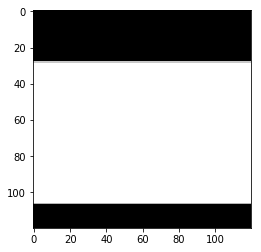

In [104]:
plt.imshow(img[cx-60:cx+60, cy-60:cy+60], 'gray');

##### 2. Contour Area


In [103]:
area = cv2.contourArea(cnt) #or M['moo']
area

11700.0

##### 3. Contour Perimeter

Also called Arc Length. Second argument specify whether shape is a closed contour (if passed True), or just a curve.



In [115]:
per = cv2.arcLength(cnt, True)
per

456.0

##### 4. checking Convexity

A function to check if a curve is convex or not, **cv2.isContourConvex**.

In [116]:
cv2.isContourConvex(cnt)

True

##### 5. Contour Approximation

It approximates a contour shape to another shape with less number of vertices depending upon the precision we specify. It is an implementation of **Douglas-Peucker Algorithm**. 

Suppose we are trying to find a square in an image, but due to some problems in the image, we didn't get a perfect square, but a 'bad shape'.  We can use **cv2.approxPolyDP** function to approximate the shape. In this, second argument is called epsilon, which is maximum distance from contour to approximated contour. It is an accuracy parameter. A wise selection of epsilon is needed to get the correct output.

In [130]:
img = cv2.imread('images/binary_image.png')
img_gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
ret, thresh = cv2.threshold(img_gray, 127, 255, 0)

image, contours, heir = cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE)
cnt = contours[0]

epsilon = 0.01*cv2.arcLength(cnt,True)
eps2 = 0.1*cv2.arcLength(cnt,True)
approx1 = cv2.approxPolyDP(cnt,epsilon,True)
approx2 = cv2.approxPolyDP(cnt,eps2,True)

In [131]:
approx1


array([[[196, 176]],

       [[186, 180]],

       [[180, 186]],

       [[176, 196]],

       [[176, 204]],

       [[180, 214]],

       [[186, 220]],

       [[195, 224]],

       [[205, 224]],

       [[214, 220]],

       [[220, 214]],

       [[224, 205]],

       [[224, 195]],

       [[220, 186]],

       [[214, 180]],

       [[204, 176]]], dtype=int32)

In [132]:
approx2

array([[[196, 176]],

       [[176, 204]],

       [[205, 224]],

       [[224, 195]]], dtype=int32)

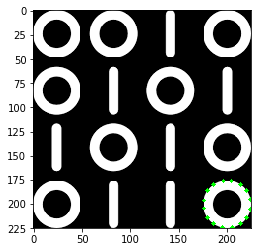

In [134]:
img_copy = img.copy()
plt.imshow(cv2.drawContours(img_copy, approx1, -1, (0, 255, 0), 3))

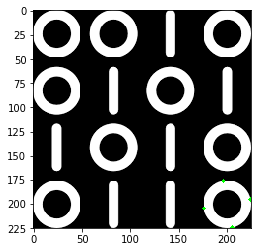

In [135]:
img_copy = img.copy()
plt.imshow(cv2.drawContours(img_copy, approx2, -1, (0, 255, 0), 3))

##### 6. Convex Hull

cv2.functions check a curve for convexity defects and corrects it. Convex curves are the curves which are alwaus bluged out, or at least flat. And if it is bulged inside, it is called convexity defects.

In [188]:
img = cv2.imread('images/Convex-Concave.png')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
_, thresh = cv2.threshold(gray, 50, 255, cv2.THRESH_BINARY)
im, contours, hierarchy =cv2.findContours(thresh, cv2.RETR_TREE, cv2.CHAIN_APPROX_SIMPLE) 

In [189]:
hull = []

for i in range(len(contours)):
    hull.append(cv2.convexHull(contours[i], False))

In [190]:
drawing = np.zeros((thresh.shape[0], thresh.shape[1], 3), np.uint8)
color_contours = (0, 255, 0)
color = (255, 0, 0)
for i in range(len(contours)):
    cv2.drawContours(drawing, contours, i, color_contours, 5, 8, hierarchy)
    cv2.drawContours(drawing, hull, i, color, 5, 8)

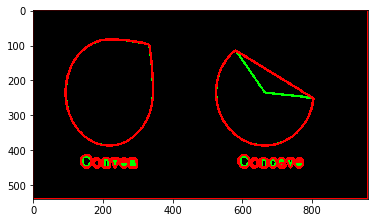

In [191]:
plt.imshow(drawing, 'gray')

##### 7. Bounding Rectangle

###### Straight Bounding Rectangle

Straight rectangle, which doesn't consider rotation of the object. So area of the bounding rectangel won't be minimum. Found using **cv2.boundingRect()**

In [195]:
cnt = contours[19]
red = (255, 0, 0)

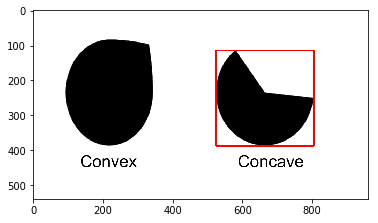

In [196]:
img_copy = img.copy()
x, y,w, h=  cv2.boundingRect(cnt)
cv2.rectangle(img_copy, (x, y), (x+w, y+h), red, 3)
plt.imshow(img_copy, 'gray')

###### Rotated Rectangle

bounding rectangle is drawn with minimum area, so it considers the rotation also. The function used is **cv2.minAreaRect()**. It returns a Box2D structure which contains following detals - ( center (x,y), (width, height), angle of rotation ). But to draw this rectangle, we need 4 corners of the rectangle. It is obtained by the function **cv2.boxPoints()**

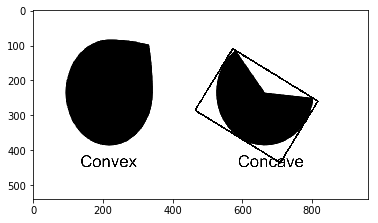

In [175]:
img_copy = img.copy()
rect = cv2.minAreaRect(cnt)
box = cv2.boxPoints(rect)
box = np.int0(box)
cv2.drawContours(img_copy, [box], 0, (0, 255, 0), 3)
plt.imshow(img_copy, 'gray')

###### 8. Minimum Enclosing Circle
we find the circumcircle of an object using the function cv2.minEnclosingCircle(). It is a circle which completely covers the object with minimum area.


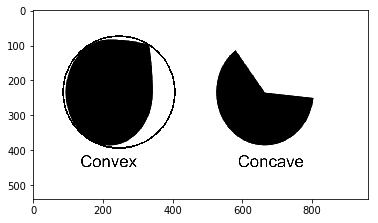

In [184]:
cnt = contours[20]
img_copy = img.copy()
(x, y), radius = cv2.minEnclosingCircle(cnt)
center = (int(x), int(y))
radius = int(radius)
cv2.circle(img_copy, center, radius, (0, 255, 0), 4)
plt.imshow(img_copy, 'gray')

###### 9. Fitting an Ellipse

It returns the rotated rectangle in which the ellipse is inscribed.

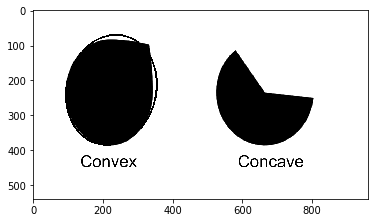

In [186]:
ellipse = cv2.fitEllipse(cnt)
img_copy = img.copy()
cv2.ellipse(img_copy,ellipse,(0, 255, 0),4)
plt.imshow(img_copy, 'gray')

###### 10. Fitting a Line

In [ ]:
rows,cols = img.shape[:2]
[vx,vy,x,y] = cv2.fitLine(cnt, cv2.DIST_L2,0,0.01,0.01)
lefty = int((-x*vy/vx) + y)
righty = int(((cols-x)*vy/vx)+y)
cv2.line(img_copy,(cols-1,righty),(0,lefty),(0,255,0),2)
